<a href="https://colab.research.google.com/github/Hulyacerit/genetik_optimizasyonu/blob/main/GenetiKOptimizasyonu_End%C3%BCstriyel_Boya_Kar%C4%B1%C5%9F%C4%B1m%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ad: Hülya
Soyad: Cerit
Okul Numarası: 2312721012
Github Repo Bağlantısı: https://github.com/Hulyacerit/genetik_optimizasyonu.git

In [2]:
# README.md DOSYASINI OLUŞTURUYORUZ
kod_readme = """
# Endüstriyel Boya Karışımı Optimizasyonu

**Ders:** Yapay Zeka Sistemleri
**Konu:** Genetik Algoritma ile Kısıtlı Optimizasyon

## Problem Tanımı
Bir boya fabrikasında A ve B pigmentlerinin ideal karışım oranı aranmaktadır.
- **Amaç Fonksiyonu:** `y = 5x1 + 2x2 - x1*x2`
- **Kısıt:** `x1 >= 30` (A pigmenti en az %30 olmalı)

##  Dosyalar
- `main.py`: Projeyi başlatan ana dosya.
- `evrim_motoru.py`: Genetik algoritma döngüsünü ve grafikleri yönetir.
- `genetik_operators.py`: Matematiksel hesaplamalar (Fitness, Mutasyon, Çaprazlama).

##  Öğrenci Bilgileri
Ad Soyad: Hülya Cerit
Numara: 2312721012
"""
with open("README.md", "w") as f:
    f.write(kod_readme)
print(" 4. Dosya Oluşturuldu: README.md")

 4. Dosya Oluşturuldu: README.md


def hesapla_kalite(x1): Problemin asıl matematiksel formulünü çözer. Pigment A oranını (x1) verilir ve fonskiyon Pigment B (x2) oranını hesaplar ve formulü uygulayarak boyanın "Kalite Puanını(y)" bulur.

def uygunluk_hesapla(x1): Bir bireyin (karışımın) ne kadar "iyi" olduğunu belirler. Ceza mekanizmasının çalışması buradadır.

def rulet_secimi(popülasyon, uygunluklar): Gelecke neslin anne ve babasını seçer. Puanı yüksek olanın seçilme şansı daha fazladır.

def mutasyon_uygula(x1, ihtimal, buyukluk=5.0): Çeşitlilik sağlar. Bazen çocuklar anne-babay tıptatıp benzemez, küçük değişimler geçirir.

def caprazlama(p1,p2): İki farklı karışım fikrini birleştirip yeni fikirler üretir.



In [3]:
# genetik_operators.py DOSYASINI OLUŞTURUYORUZ
kod_operators = '''
import numpy as np
import random

def hesapla_kalite(x1):
    """
    Amaç Fonksiyonu: y = 5x1 + 2x2 - x1*x2
    x2 = 100 - x1 Toplam %100 olmalı: x1 belliyse x2 otomatiktir.
    """
    x2 = 100 - x1 #
    y = (5 * x1) + (2 * x2) - (x1 * x2)
    return y, x2

def uygunluk_hesapla(x1):
    """
    Genetik algoritma puanı (Fitness).
    Kısıt: x1 >= 30 olmalı.
    """
    kalite_puani, x2 = hesapla_kalite(x1)

    ceza = 0
    # KISIT KONTROLÜ
    if x1 < 30:
        ceza = 5000 # 30'un altındaysa puanı öldür (Elensin diye)
    if x1 > 100 or x1 < 0:
        ceza = 5000 # Mantıksız değerler için ceza

    return kalite_puani - ceza

def rulet_secimi(populasyon, uygunluklar):
    # Negatif puanları pozitife çevir (Rulet mantığı için şart)
    min_val = min(uygunluklar)
    if min_val < 0:
        pozitif = uygunluklar - min_val + 1
    else:
        pozitif = uygunluklar + 1e-6

    prob = pozitif / sum(pozitif)
    secilenler = np.random.choice(len(populasyon), size=2, p=prob)
    return populasyon[secilenler[0]], populasyon[secilenler[1]]

def mutasyon_uygula(x1, ihtimal, buyukluk=5.0):
    """
    Pigment A oranını %5 civarında rastgele oynatır.
    """
    if random.random() < ihtimal:
        degisim = random.uniform(-buyukluk, buyukluk)
        x1 += degisim
        x1 = max(0, min(100, x1)) # 0-100 arasında tut
    return x1

def caprazlama(p1, p2):
    """
    İki oranın ortalamasını alarak çocuk üretir.
    """
    c1 = (p1 + p2) / 2
    c2 = (p1 * 0.7) + (p2 * 0.3)
    return c1, c2
'''

with open("genetik_operators.py", "w") as f:
    f.write(kod_operators)
print("1. Dosya Oluşturuldu: genetik_operators.py")

1. Dosya Oluşturuldu: genetik_operators.py


from genetik_operators import (
    hesapla_kalite, uygunluk_hesapla,
    rulet_secimi, mutasyon_uygula, caprazlama
): genetik_operators.py dosyasındaki gerekli fonksiyonları çağırır.

def evrimsel_algoritma(): Algoritma cevabı bilmediği için işe rastgele tahminlerle başlar. Yani rastgele A ve B pigmenti için oranlar üretir.

for nesil in range(nesil_sayisi): Her nesilde popülasyondaki her bireyin uygunluk puanını hesaplar. Puanı en yüksel olanı bulur ve elit_birey olarka işaretler.

Elitizm: En iyi bireyi (elit_birey) bozulmasan direkt yeni listeye koyar böylece en iyi çözüm kaybedilmez.
Döngü: Popülasyon sayısı dolana kadar rulet, çaprazlama, mutasyon işlemleriyle yeni çocuk üretilir.



In [4]:
# evrim_motoru.py DOSYASINI OLUŞTURUYORUZ
kod_motor = '''
import numpy as np
import matplotlib.pyplot as plt
from genetik_operators import (
    hesapla_kalite, uygunluk_hesapla,
    rulet_secimi, mutasyon_uygula, caprazlama
)

def evrimsel_algoritma(populasyon_boyutu, nesil_sayisi, mutasyon_ihtimali):

    # 1. Başlangıç: 0-100 arası rastgele Pigment A oranları
    populasyon = np.random.uniform(0, 100, populasyon_boyutu)

    gecmis_skorlar = []
    gecmis_x1 = []

    print(f"{'NESİL':<10} | {'KALİTE (y)':<15} | {'PIGMENT A':<15} | {'PIGMENT B':<15}")
    print("-" * 65)

    for nesil in range(nesil_sayisi):
        # Herkesin puanını hesapla
        uygunluklar = np.array([uygunluk_hesapla(x) for x in populasyon])

        # En iyiyi bul (Elitizm)
        en_iyi_idx = np.argmax(uygunluklar)
        elit_birey = populasyon[en_iyi_idx]
        elit_skor = uygunluklar[en_iyi_idx]

        # Kayıt tut
        gecmis_skorlar.append(elit_skor)
        gecmis_x1.append(elit_birey)

        # Ekrana yazdır
        puan, x2 = hesapla_kalite(elit_birey)
        print(f"{nesil+1:<10} | {puan:.2f}           | %{elit_birey:.2f}          | %{x2:.2f}")

        # YENİ NESİL
        yeni_populasyon = [elit_birey] # En iyiyi koru

        while len(yeni_populasyon) < populasyon_boyutu:
            # Seçim
            p1, p2 = rulet_secimi(populasyon, uygunluklar)
            # Çaprazlama
            c1, c2 = caprazlama(p1, p2)
            # Mutasyon
            c1 = mutasyon_uygula(c1, mutasyon_ihtimali)
            c2 = mutasyon_uygula(c2, mutasyon_ihtimali)

            yeni_populasyon.extend([c1, c2])

        populasyon = np.array(yeni_populasyon[:populasyon_boyutu])

    # --- GRAFİKLERİ ÇİZ VE KAYDET ---
    plt.figure(figsize=(10, 5))

    # Grafik 1: Kalite
    plt.subplot(1, 2, 1)
    plt.plot(gecmis_skorlar, color='green', marker='o')
    plt.title("Kalite Puanı Artışı")
    plt.xlabel("Nesil")
    plt.ylabel("Puan")
    plt.grid(True)

    # Grafik 2: Oranlar
    plt.subplot(1, 2, 2)
    plt.plot(gecmis_x1, label='Pigment A', color='blue')
    plt.plot(100 - np.array(gecmis_x1), label='Pigment B', color='red')
    plt.title("Pigment Oranlarının Dengelenmesi")
    plt.xlabel("Nesil")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig("sonuc_grafigi.png") # Resmi de kaydet
    plt.show()
'''

with open("evrim_motoru.py", "w") as f:
    f.write(kod_motor)
print(" 2. Dosya Oluşturuldu: evrim_motoru.py")

 2. Dosya Oluşturuldu: evrim_motoru.py


from evrim_motoru import evrimsel_algoritma:  Kütüphane bağlantısı: evrim_motoru.py dosyasındaki evrimsel_algoritma fonksiyonunu kullanacağını belirtir.

populasyon_boyutu=20: Aynı anda 20 farklı boya karışımı deneyecek.

nesil_sayisi=100: Algoritma 100 tur boyunca evrimleşecek.

mutasyon_ihtimali=0.2: Her çocuk üretildiğinde %20 şansla genleri rasgele değişecek. Bu çeşitliliği artırır.


In [7]:
# main.py DOSYASINI OLUŞTURUYORUZ
kod_main = '''
from evrim_motoru import evrimsel_algoritma

print(" BOYA KARIŞIMI OPTİMİZASYONU BAŞLATILIYOR...")
print("Senaryo: y = 5x1 + 2x2 - x1x2 (Maksimum Kalite)")
print("Kısıt: Pigment A (x1) >= 30\\n")

if __name__ == "__main__":
    # 20 Birey, 20 Nesil, %20 Mutasyon Şansı
    evrimsel_algoritma(populasyon_boyutu=20, nesil_sayisi=20, mutasyon_ihtimali=0.2)
'''

with open("main.py", "w") as f:
    f.write(kod_main)
print(" 3. Dosya Oluşturuldu: main.py")

 3. Dosya Oluşturuldu: main.py


 Kod çalışıyor...
 BOYA KARIŞIMI OPTİMİZASYONU BAŞLATILIYOR...
Senaryo: y = 5x1 + 2x2 - x1x2 (Maksimum Kalite)
Kısıt: Pigment A (x1) >= 30

NESİL      | KALİTE (y)      | PIGMENT A       | PIGMENT B      
-----------------------------------------------------------------
1          | 79.52           | %95.74          | %4.26
2          | 79.52           | %95.74          | %4.26
3          | 79.52           | %95.74          | %4.26
4          | 79.52           | %95.74          | %4.26
5          | 79.52           | %95.74          | %4.26
6          | 79.52           | %95.74          | %4.26
7          | 415.49           | %99.17          | %0.83
8          | 415.49           | %99.17          | %0.83
9          | 500.00           | %100.00          | %0.00
10         | 500.00           | %100.00          | %0.00
11         | 500.00           | %100.00          | %0.00
12         | 500.00           | %100.00          | %0.00
13         | 500.00           | %100.00          | %0.00
14

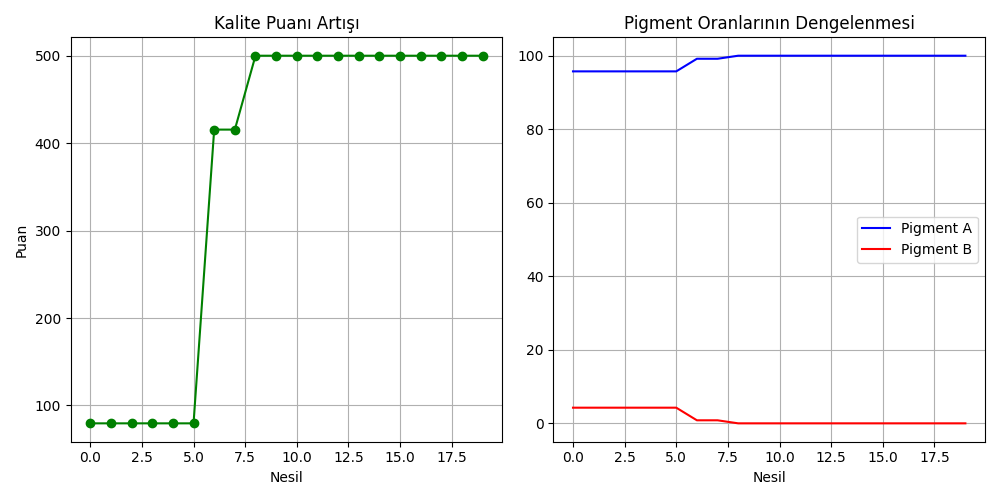

In [8]:
from IPython.display import Image, display

# 1. Programı arka planda çalıştır (Dosyalar ve Grafik oluşsun)
print(" Kod çalışıyor...")
!python main.py

# 2. Oluşan grafiği ekrana getir
print("\n SONUÇ GRAFİĞİ:")
try:
    display(Image(filename='sonuc_grafigi.png'))
except:
    print("Grafik dosyası bulunamadı, kod hata vermiş olabilir.")